## Univariate Linear Regression implemented from scratch  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# This is a Linear Regression problem 
# Here we are trying to predict a company's profit based on the population of the cities in which it works
# X is population in 10,000's and Y is the profit in 10,000's

### Loading and Plotting the data

In [3]:
data = pd.read_csv('Data/ex1data1.txt',delimiter=',',names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


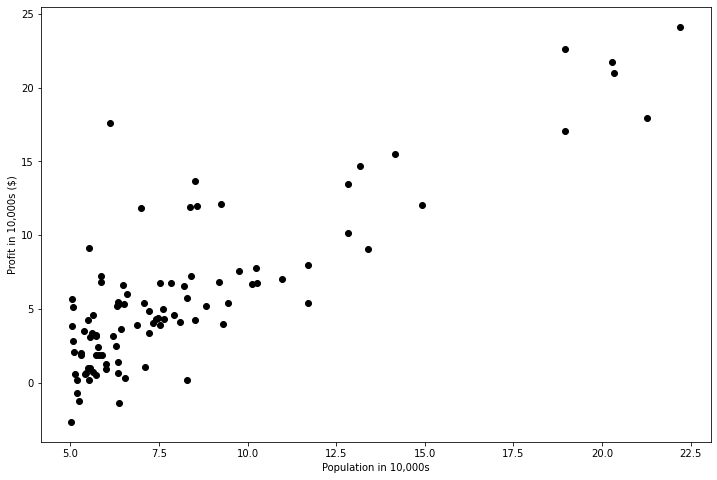

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(data['Population'],data['Profit'],c='black')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in 10,000s ($)')
plt.show()

In [5]:
X = np.array(data.Population, 'float')
Y = np.array(data.Profit, 'float')

In [6]:
def cost_function(x,y,theta):
    m=len(y)
    a=1/(2*m)
    b=np.sum((np.dot(theta,x) - y)**2)
    j=a*b
    return j    

In [7]:
one_mat=np.ones(len(Y))
X_new=np.vstack((one_mat,X))
theta=np.array([0,0])#Initial value

In [8]:
def gradient(x,y,theta):
    m=len(y)
    alpha=0.01
    iterations=3000
    
    #gradient descent algorithm
    J_history = np.zeros([iterations, 1])
    
    for iter in range(iterations):
        error = np.dot(theta,x) - y
        temp0 = theta[0] - (alpha/m) * (np.sum((np.dot(error,x[0,:]))))
        temp1 = theta[1] - (alpha/m) * (np.sum((np.dot(error,x[1,:]))))
        theta = np.array([temp0,temp1])
    
        J_history[iter] = cost_function(x,y,theta)   #compute J value for each iteration 
    return theta, J_history

In [9]:
theta_new,j = gradient(X_new,Y,theta)
print(theta_new)
print(j[j.size-1])

[-3.87805118  1.1912525 ]
[4.47699999]


### Plotting cost function over multiple iterations

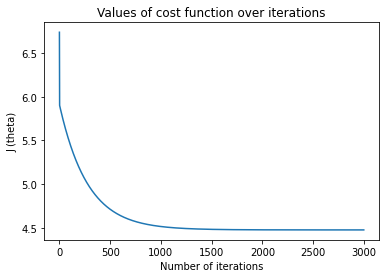

In [10]:
j_list = j.tolist()
plt.plot(j_list)
plt.xlabel("Number of iterations")
plt.ylabel("J (theta)")
plt.title("Values of cost function over iterations")
plt.show()

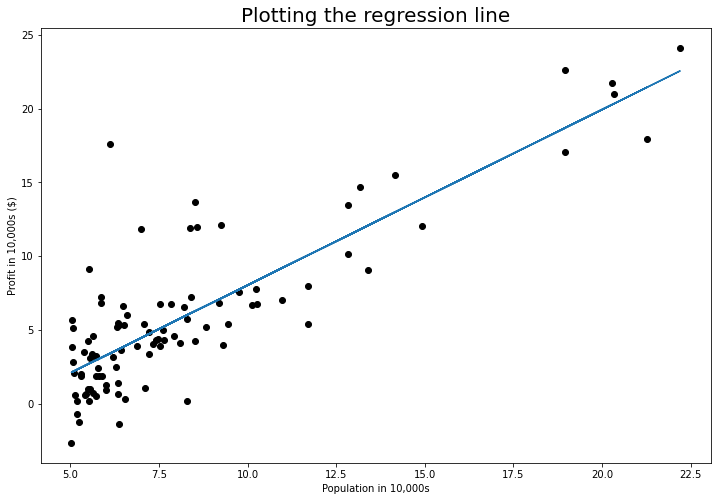

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(X,Y,c='black')
plt.plot(X,np.dot(theta_new,X_new),'-')
plt.title('Plotting the regression line',fontsize=20)
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in 10,000s ($)')
plt.show()

### Testing our regression model with input

In [14]:
x1=float(input('Enter Population'))
y1=theta_new[0] + theta_new[1]*(x1/10000)
print('Predicted profit($) is {:.6}'.format(y1*10000))

Enter Population 78900


Predicted profit($) is 55209.3


### 3D Plot of our Cost Function wrt theta values

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
theta_0 = np.linspace(-7,7,100)
theta_1 = np.linspace(-1,2,100)
cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i] , theta_1[j]])
        cost_values[i,j] = cost_function(X_new,Y,t)

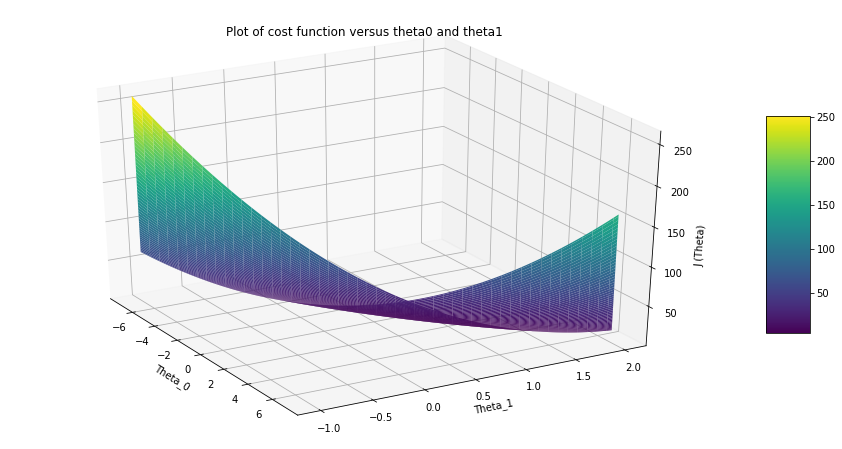

In [17]:
fig = plt.figure(figsize=(16,8))
ax  = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0 ,theta_1 ,cost_values, cmap='viridis')
fig.colorbar(surf , shrink=0.5 , aspect=5)

plt.xlabel('Theta_0')
plt.ylabel('Theta_1')
ax.set_zlabel('J (Theta)')
plt.title("Plot of cost function versus theta0 and theta1")
ax.view_init(30,330)
plt.show()